# Delicious Asian and Indian Cuisines 

In [2]:
%pip install upgrade install pip

ERROR: Could not find a version that satisfies the requirement upgrade (from versions: none)
ERROR: No matching distribution found for upgrade
You should consider upgrading via the '/home/max/MIcrosoft_AI/ML_notes/mltools/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE 


In [2]:
# Read the data from csv
df = pd.read_csv('../data/cuisines.csv')
df.head()

,Unnamed: 0,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,65,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,66,indian,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,67,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,68,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,69,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [3]:
# check the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2448 entries, 0 to 2447
Columns: 385 entries, Unnamed: 0 to zucchini
dtypes: int64(384), object(1)
memory usage: 7.2+ MB


In [4]:
df.describe()

,Unnamed: 0,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
count,2448.000000,2448.000000,2448.0,2448.000000,2448.000000,2448.000000,2448.0,2448.000000,2448.0,2448.000000,...,2448.0,2448.000000,2448.000000,2448.000000,2448.000000,2448.0,2448.000000,2448.000000,2448.000000,2448.000000
mean,16040.551471,0.018382,0.0,0.000408,0.002859,0.013889,0.0,0.005310,0.0,0.002451,...,0.0,0.000817,0.020833,0.004085,0.067810,0.0,0.001634,0.015523,0.059232,0.008578
std,13625.719887,0.134357,0.0,0.020211,0.053408,0.117054,0.0,0.072694,0.0,0.049457,...,0.0,0.028577,0.142855,0.063796,0.251472,0.0,0.040398,0.123645,0.236107,0.092241
min,65.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,10907.750000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,15263.500000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,16926.250000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
max,57690.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,...,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

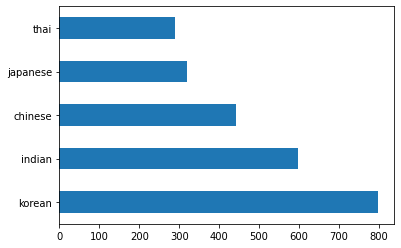

In [7]:
# Find the distribution according to cuisine
# df['cuisine'].value_counts().plot.barh()
df.cuisine.value_counts().plot.barh()

In [8]:
# Data per cuisine
thai_df = df[(df.cuisine == "thai")]
japanese_df = df[(df.cuisine == "japanese")]
chinese_df = df[(df.cuisine == "chinese")]
indian_df = df[(df.cuisine == "indian")]
korean_df = df[(df.cuisine == "korean")]

print(f'thai df: {thai_df.shape}')
print(f'japanese df: {japanese_df.shape}')
print(f'chinese df: {chinese_df.shape}')
print(f'indian df: {indian_df.shape}')
print(f'korean df: {korean_df.shape}')

thai df: (289, 385)
japanese df: (320, 385)
chinese df: (442, 385)
indian df: (598, 385)
korean df: (799, 385)


In [22]:
def create_ingredient_df(df):
    ingredient_df =df.T.drop(['cuisine', 'Unnamed: 0']).sum(axis=1).to_frame('value') # transpose the dataframe
    print(ingredient_df.head())
    ingredient_df = ingredient_df[(ingredient_df.T !=0).any()]
    print(ingredient_df.head())
    ingredient_df = ingredient_df.sort_values(by='value', ascending=False, inplace=False)
    print(ingredient_df.head())
    return ingredient_df

## investigate ingredients per cuisine

            value
almond        3.0
angelica      0.0
anise         1.0
anise_seed    0.0
apple         4.0
           value
almond       3.0
anise        1.0
apple        4.0
apricot      1.0
asparagus    4.0
          value
garlic    173.0
fish      153.0
cayenne   136.0
cilantro  121.0
ginger    114.0


<AxesSubplot:>

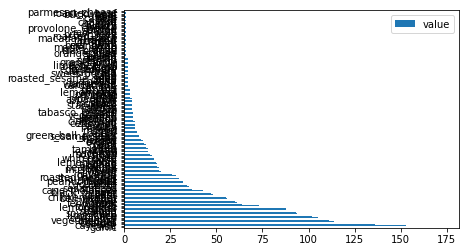

In [23]:
thai_ingredient_df = create_ingredient_df(thai_df)
thai_ingredient_df.plot.barh()

In [ ]:
cuisine_origin = [japanese_df, indian_df,korean_df,thai_df, chinese_df]

for origin in cuisine_origin:
    origin_ingredients_df = create_ingredient_df(origin)
    origin_ingredients_df.head(10).plot.barh()

<AxesSubplot:>

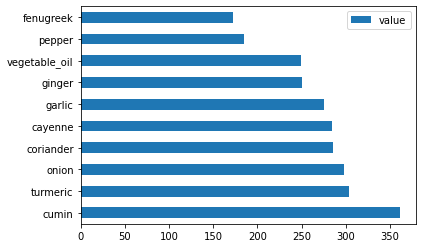

In [14]:
indian_ingredient_df = create_ingredient_df(indian_df)
indian_ingredient_df.head(10).plot.barh()

<AxesSubplot:>

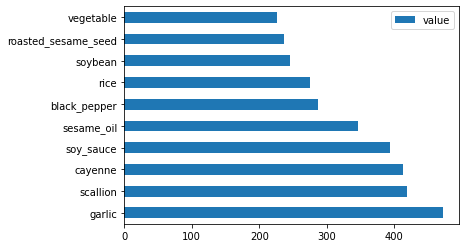

In [15]:
korean_ingredient_df = create_ingredient_df(korean_df)
korean_ingredient_df.head(10).plot.barh()

<AxesSubplot:>

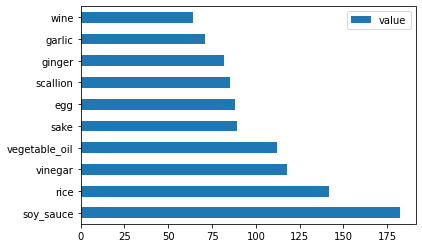

In [16]:
japanese_ingredient_df = create_ingredient_df(japanese_df)
japanese_ingredient_df.head(10).plot.barh()

<AxesSubplot:>

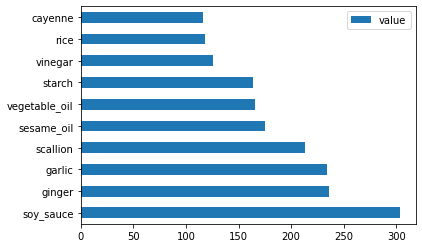

In [17]:
chinese_ingredient_df = create_ingredient_df(chinese_df)
chinese_ingredient_df.head(10).plot.barh()

In [18]:
# drop the common ingredients
df.columns

Index(['Unnamed: 0', 'cuisine', 'almond', 'angelica', 'anise', 'anise_seed',
       'apple', 'apple_brandy', 'apricot', 'armagnac',
       ...
       'whiskey', 'white_bread', 'white_wine', 'whole_grain_wheat_flour',
       'wine', 'wood', 'yam', 'yeast', 'yogurt', 'zucchini'],
      dtype='object', length=385)

In [19]:
chinese_ingredient_df.head(10)

,value
soy_sauce,303.0
ginger,236.0
garlic,234.0
scallion,213.0
sesame_oil,175.0
vegetable_oil,166.0
starch,164.0
vinegar,126.0
rice,118.0
cayenne,116.0
